<center><img src="Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>
<center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>

# Morphological operations

Teorie bodovych mnozin, binarni transformace, posunuti, dilatace, eroze, otevreni(e+d), uzavreni(d+e), strukturni element, odstraneni sumu, malych objektu, zdurazneni struktury, popis objektu, otevreni a uzavreni je idempotentni.

Strukturni element - stejna vlastnost pro ruzne smery = izotropie

dilatace - zaplneni der a zalivu, kumutativni, asociatiovni, invariantni k posunuti

eroze - zmizi male objekty, objekty se zmensi o 1 slupku, odecteni od puvodniho obrazu ->obrysy, invariantni k posunuti

otevreni - oddeli objekty spojene uzkou siji, odstrani male detaily = E+D

uzavreni - spoji blizke objekty, zaplni mle diry a uzke zalivy = D+E

skelet - mnozina stredu kruznic, ktere jsou obsazeny v Y a dotykaji se Y alespon ve 2 bodech, lze vytvorit pomoci erozi a dilataci

In [1]:
import skimage
import skimage.io
import skimage.color
import skimage.morphology

import matplotlib.pyplot as plt

import numpy as np

import scipy
import scipy.ndimage

c:\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  This is separate from the ipykernel package so we can avoid doing imports until


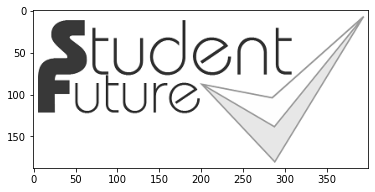

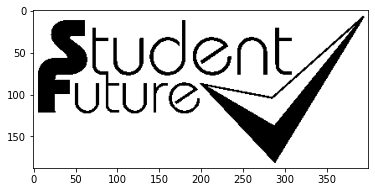

In [2]:
# thresholding - prahování
text_color = skimage.io.imread('studentfuture.png')
text_gray = skimage.color.rgb2gray(text_color)
plt.imshow(text_gray, cmap = 'gray')
plt.show()
textb = text_gray*255 > 245
plt.imshow(textb, cmap = 'gray')
plt.show()

In [9]:
def dilatace(imageB, size):
    im2 = []
    return im2

In [10]:
def eroze(imageB, size):
    im2 = []
    return im2

In [11]:
def otevreni(imageB, size):
    el = np.ones((size,size))
    img2 = imageB
    img2 = eroze(img2, size)
    img2 = dilatace(img2, size)
    return img2

In [12]:
def uzavreni(imageB, size):
    el = np.ones((size,size))
    img2 = imageB
    img2 = dilatace(img2, size)
    img2 = eroze(img2, size)
    return img2

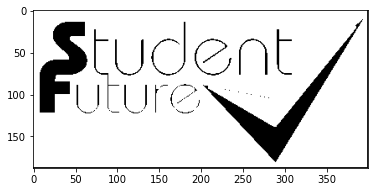

In [13]:
dilatace1 = dilatace(textb, 3)
plt.imshow(dilatace1, cmap = 'gray')
plt.show()

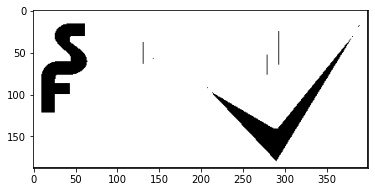

In [14]:
dilatace2 = dilatace(textb, 5)
plt.imshow(dilatace2, cmap = 'gray')
plt.show()

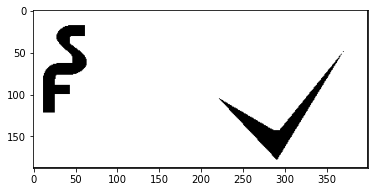

In [15]:
dilatace3 = dilatace(textb, 7)
plt.imshow(dilatace3, cmap = 'gray')
plt.show()

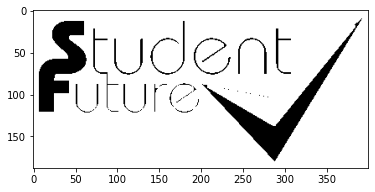

In [3]:
size = 3
kernel = np.ones((size,size))
dilatace4 = skimage.morphology.binary_dilation(textb, kernel)
plt.imshow(dilatace4, cmap = 'gray')
plt.show()

[[0 1 0]
 [1 1 1]
 [0 1 0]]


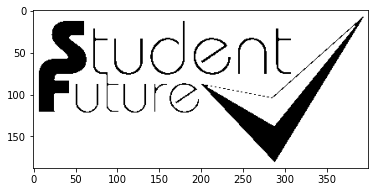

In [4]:
kernel = skimage.morphology.diamond(1).astype(np.uint8)
print(kernel)
dilatace5 = skimage.morphology.binary_dilation(textb, kernel)
plt.imshow(dilatace5, cmap = 'gray')
plt.show()

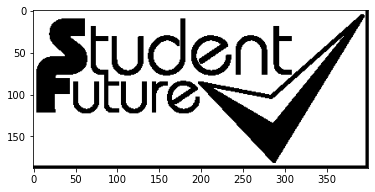

In [18]:
eroze1 = eroze(textb, 3)
plt.imshow(eroze1, cmap = 'gray')
plt.show()

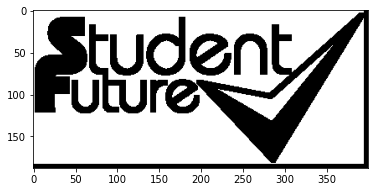

In [19]:
eroze2 = eroze(textb, 5)
plt.imshow(eroze2, cmap = 'gray')
plt.show()

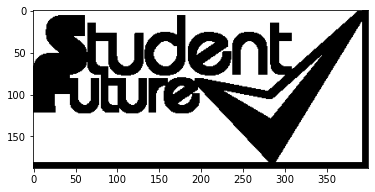

In [20]:
eroze3 = eroze(textb, 7)
plt.imshow(eroze3, cmap = 'gray')
plt.show()

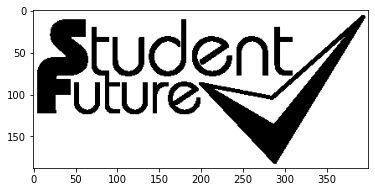

In [6]:
size = 3
kernel = np.ones((size,size))
erosion4 = skimage.morphology.binary_erosion(textb, kernel)
plt.imshow(erosion4, cmap = 'gray')
plt.show()

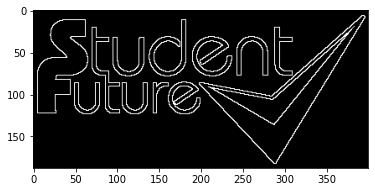

In [20]:
obrys = textb^erosion4
plt.imshow(obrys, cmap = 'gray')
plt.show()

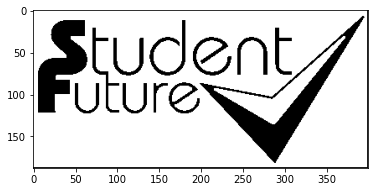

In [23]:
otevreni1 = otevreni(textb, 3)
plt.imshow(otevreni1, cmap = 'gray')
plt.show()

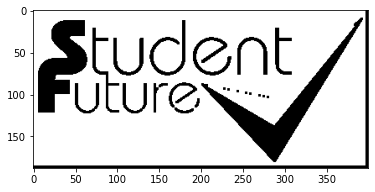

In [24]:
uzavreni1 = uzavreni(textb, 3)
plt.imshow(uzavreni1, cmap = 'gray')
plt.show()

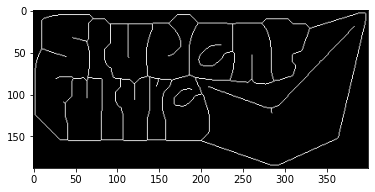

In [19]:
skeleton =  skimage.morphology.skeletonize(textb)
plt.imshow(skeleton, cmap = 'gray')
plt.show()

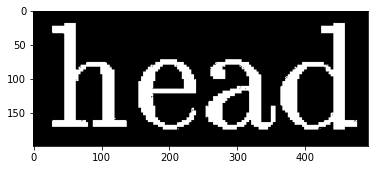

In [21]:
head_color = skimage.io.imread('http://www.kky.zcu.cz/uploads/courses/zdo/lesson5/original.jpg')
head_gray = skimage.color.rgb2gray(head_color)
headb = head_gray > 0.5
plt.imshow(headb, cmap='gray')
plt.show()

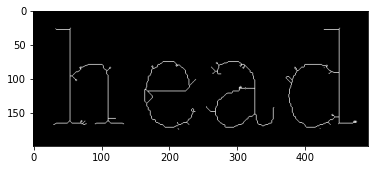

In [22]:
skeleton =  skimage.morphology.skeletonize(headb)
plt.imshow(skeleton, cmap = 'gray')
plt.show()

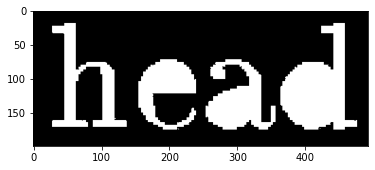

In [23]:
headh = scipy.ndimage.morphology.binary_fill_holes(headb)
plt.imshow(headh, cmap='gray')
plt.show()

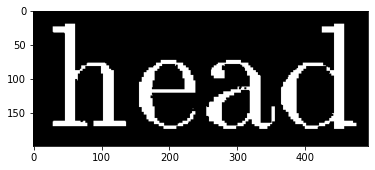

In [14]:
size = 3
kernel = np.ones((size,size))
erosion5 = skimage.morphology.binary_erosion(headb, kernel)
plt.imshow(erosion5, cmap = 'gray')
plt.show()

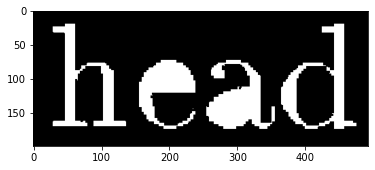

In [15]:
headh = scipy.ndimage.morphology.binary_fill_holes(erosion5)
plt.imshow(headh, cmap='gray')
plt.show()

Pocet pismen je: 5


c:\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """Entry point for launching an IPython kernel.


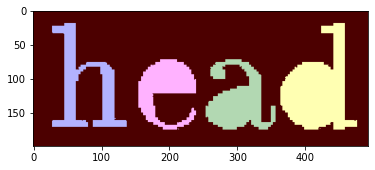

In [24]:
image_label_overlay = skimage.color.label2rgb(skimage.measure.label(headh), image=headh)
plt.imshow(image_label_overlay)
print ("Pocet pismen je:", skimage.measure.label(headh).max()-1)

Cviceni, oddelte nasledujici ctverce od sebe spoctete kolik jich tam je.

